# Eksploracja, wykresy, regresja

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

Pokażę proste metody statystyczne takie jak regresja liniowa.

[SkillCraft - zbiór danych](http://summit.sfu.ca/item/13328 ) graczy z rozgrywek w strategię czasu rzeczywistego  [StarCraft 2](https://en.wikipedia.org/wiki/StarCraft_II:_Wings_of_Liberty), związanych a artykułem:

* Thompson JJ, Blair MR, Chen L, Henrey AJ (2013) [Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning.](http://dx.doi.org/10.1371/journal.pone.0075129) PLoS ONE 8(9): e75129.

Skrótowe infromacje w [tym archiwum](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset), w szczególności opis zmiennych (przedstawiamy wybrane):

> * `2.` LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal) 
* `3.` Age: Age of each player (integer) 
* `4.` HoursPerWeek: Reported hours spent playing per week (integer) 
* `5.` TotalHours: Reported total hours spent playing (integer) 
* `6.` APM: Action per minute (continuous) 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dane/SkillCraft1_Dataset.csv", na_values=["?"])

In [3]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


In [4]:
df.groupby("LeagueIndex").size()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [5]:
df[df.LeagueIndex == 7].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
104,357,7,21,24,1000,286.4538,0.017852,0.000717,6,0.000049,0.001298,0.006206,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000
119,398,7,24,16,1250,216.6852,0.011957,0.000396,6,0.000528,0.000839,0.005691,21.6119,32.6225,5.0083,33,0.000688,8,0.000038,0.000000
320,953,7,25,42,2400,182.6208,0.005607,0.000310,8,0.000203,0.000662,0.005254,24.4969,38.6260,5.4065,18,0.001164,7,0.000000,0.000000
368,1096,7,19,56,1700,130.8600,0.003419,0.000552,5,0.000104,0.000069,0.003108,18.7416,52.3111,6.6667,15,0.000932,5,0.000000,0.000000


In [6]:
df[df.LeagueIndex == 8].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0


In [7]:
df_mniej = df[df.LeagueIndex <= 6]

In [8]:
df_mniej.groupby("LeagueIndex").size()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
dtype: int64

In [9]:
df_mniej = df

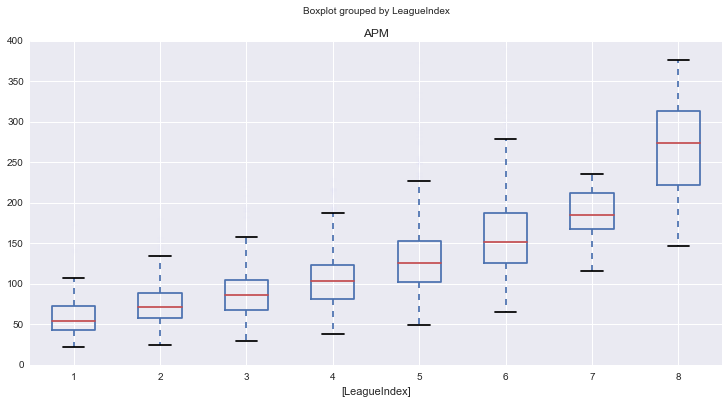

In [10]:
df[["LeagueIndex","APM"]].dropna().boxplot(by="LeagueIndex", figsize=(12,6))

In [12]:
df.groupby("LeagueIndex")['Age'].count().astype(float) / df.groupby("LeagueIndex")['Age'].size().astype(float)

LeagueIndex
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
dtype: float64

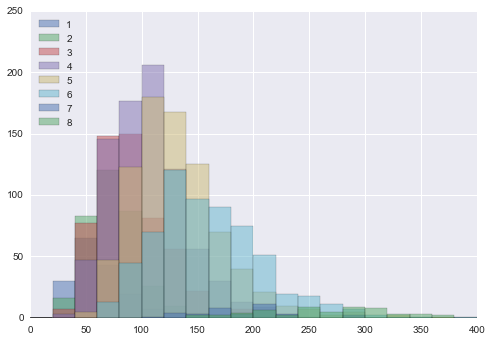

In [13]:
for k, v in df_mniej.groupby("LeagueIndex")['APM']:
    v.hist(range=(0, 400), bins=20, alpha=0.5, label=str(k))
plt.legend(loc="upper left")

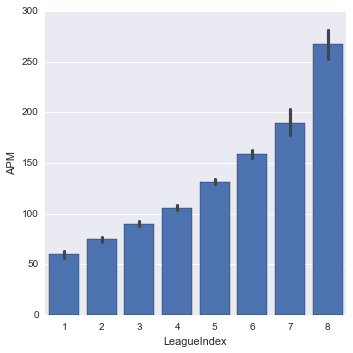

In [14]:
sns.factorplot("LeagueIndex", "APM", data=df)

In [15]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


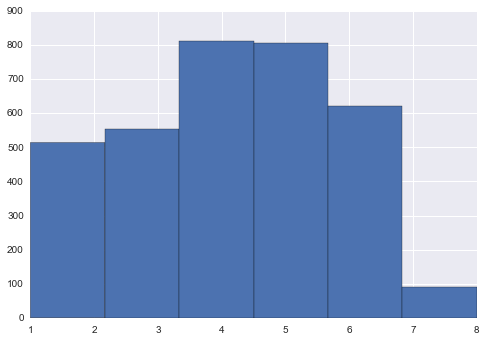

In [16]:
# wyższa liga, lepiej
df["LeagueIndex"].hist(bins=6)

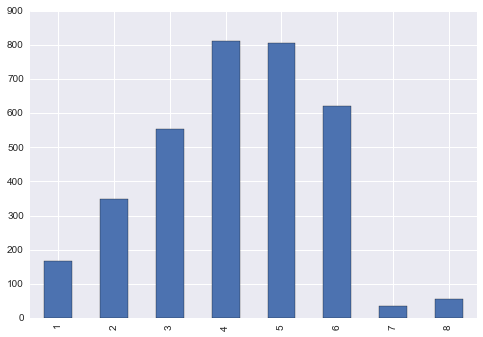

In [17]:
df["LeagueIndex"].value_counts().sort_index().plot(kind='bar')

In [18]:
df_some = df.loc[:,"LeagueIndex":"APM"]

In [19]:
df_some.corr()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.127825,0.217976,0.023884,0.662309
Age,-0.127825,1.000000,-0.184508,-0.016630,-0.210559
HoursPerWeek,0.217976,-0.184508,1.000000,0.024306,0.246844
TotalHours,0.023884,-0.016630,0.024306,1.000000,0.072850
APM,0.662309,-0.210559,0.246844,0.072850,1.000000


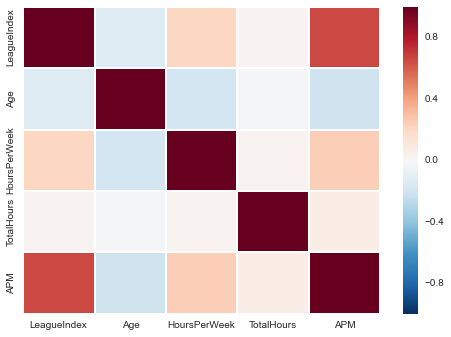

In [20]:
sns.heatmap(df_some.corr())

In [21]:
df_some.corr(method='spearman')

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.080620,0.223304,0.496817,0.676098
Age,-0.080620,1.000000,-0.208218,-0.023819,-0.185088
HoursPerWeek,0.223304,-0.208218,1.000000,0.450767,0.251820
TotalHours,0.496817,-0.023819,0.450767,1.000000,0.400220
APM,0.676098,-0.185088,0.251820,0.400220,1.000000


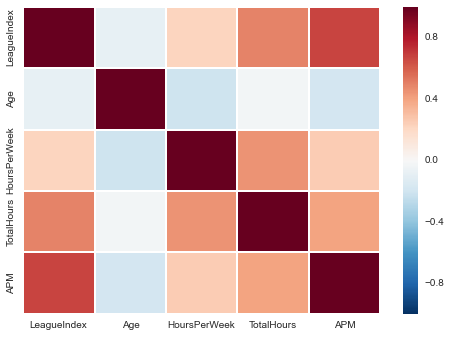

In [22]:
sns.heatmap(df_some.corr(method='spearman'))

/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


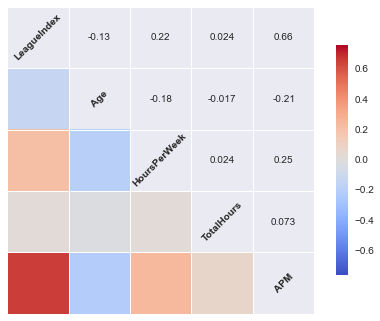

In [23]:
sns.corrplot(df_some)

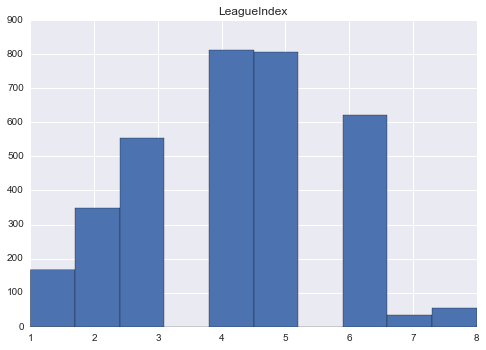

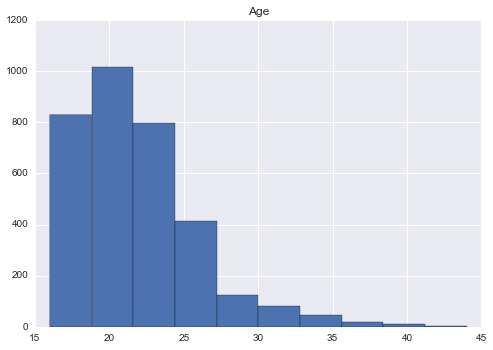

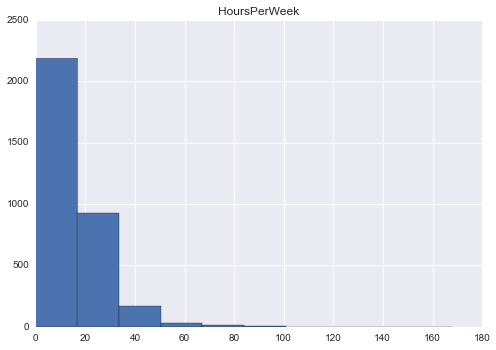

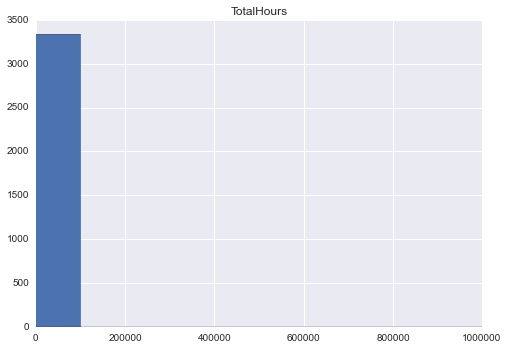

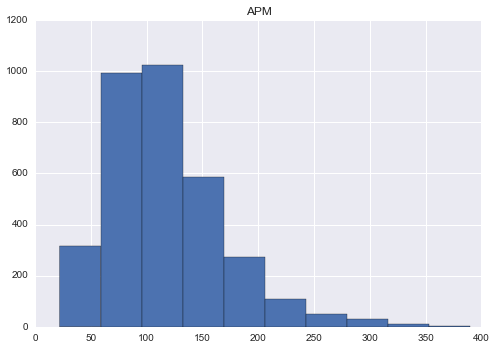

In [24]:
for col in df_some:
    df_some[col].hist()
    plt.title(col)
    plt.show()

In [25]:
df_przeskalowane = df_some.query("HoursPerWeek > 0").dropna()[["LeagueIndex"]].copy()
for col in df_some.columns[1:]:
    df_przeskalowane[col + "_log10"] = np.log10(df_some[col])

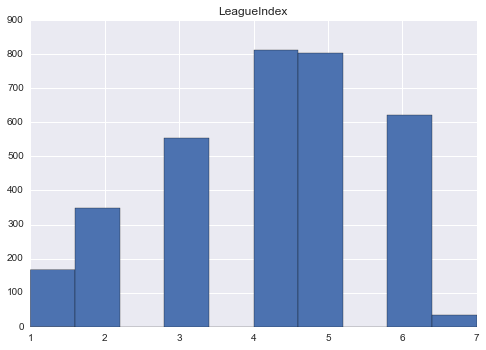

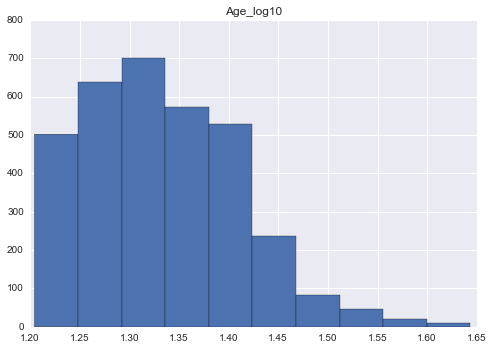

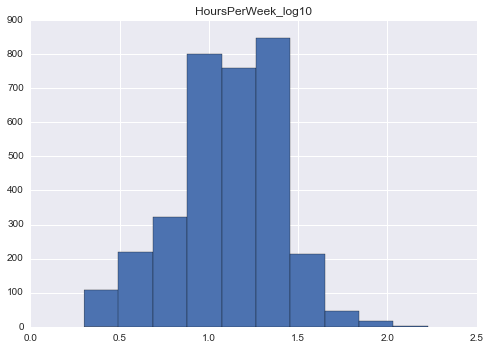

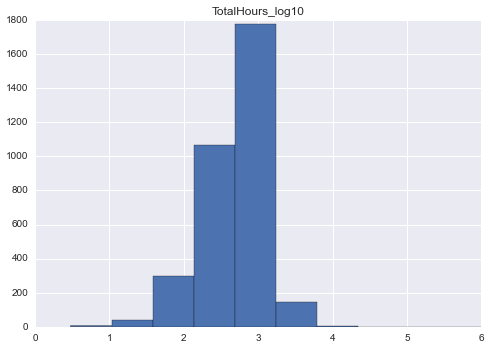

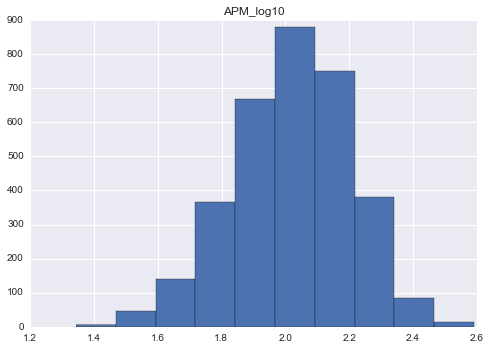

In [26]:
# Wydaje sie, ze dla wszystkiego procz ligii lepsza bylaby skala logarytmiczna
for col in df_przeskalowane:
    df_przeskalowane[col].hist()
    plt.title(col)
    plt.show()

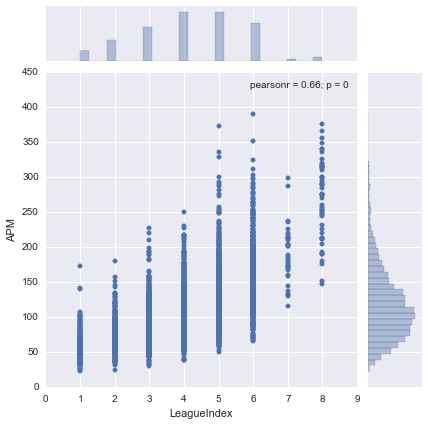

In [27]:
sns.jointplot(x="LeagueIndex", y="APM", data=df_some)

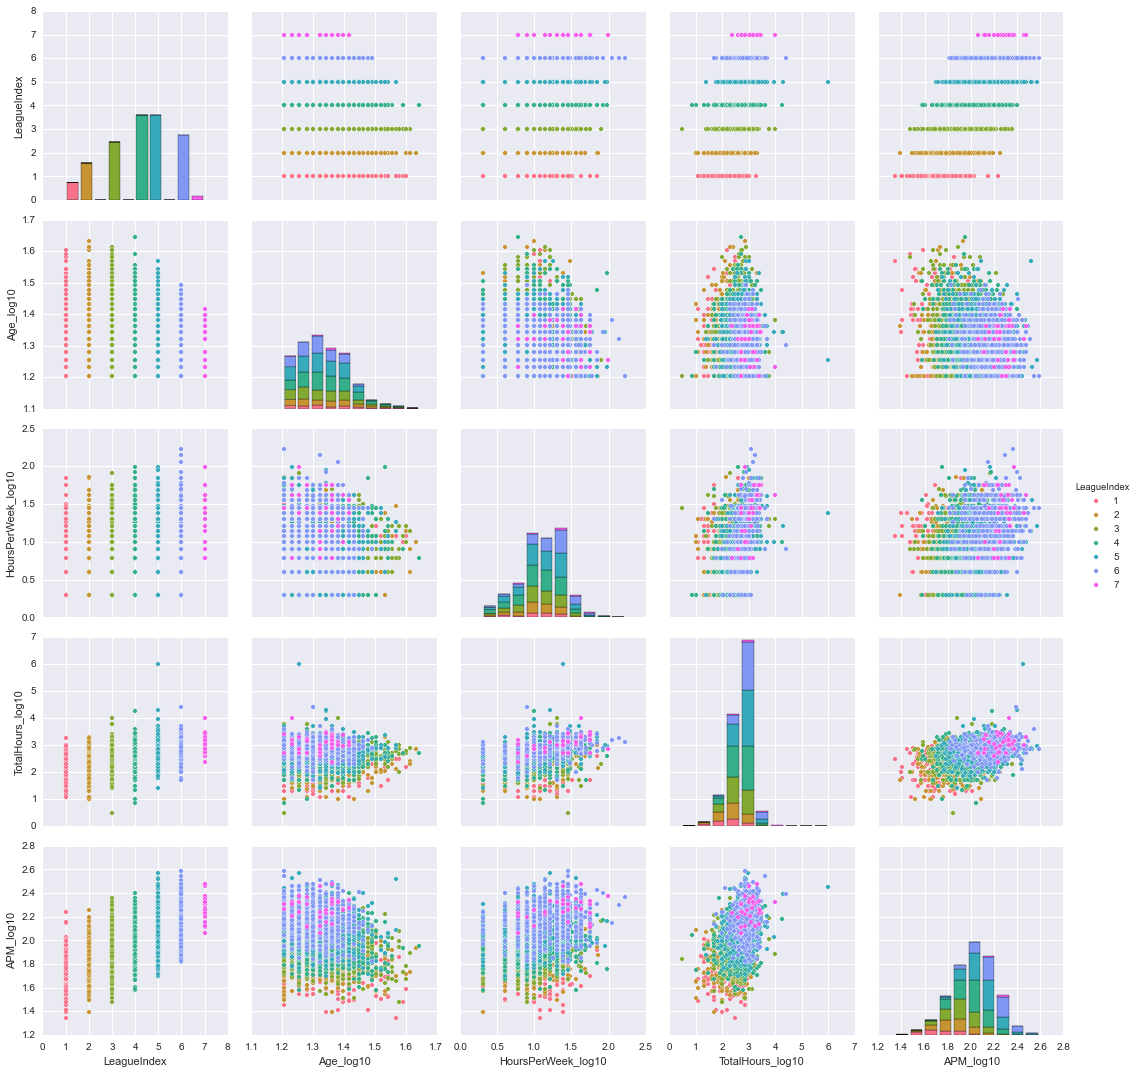

In [28]:
sns.pairplot(df_przeskalowane, hue="LeagueIndex")

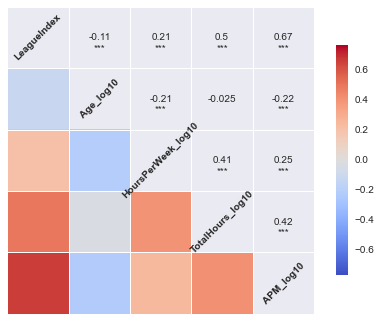

In [29]:
sns.corrplot(df_przeskalowane)

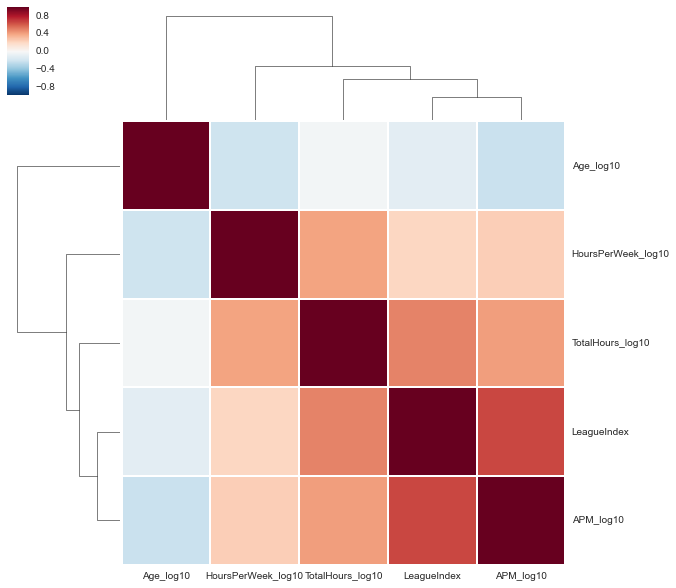

In [30]:
sns.clustermap(df_przeskalowane.corr())

In [31]:
from sklearn import linear_model

In [32]:
df_z = (df_przeskalowane - df_przeskalowane.mean())/df_przeskalowane.std()
Y = df_z["LeagueIndex"].values
X = df_z.iloc[:,1:].values

In [33]:
X.shape

(3337, 4)

In [34]:
Y.shape

(3337,)

In [35]:
reg = linear_model.LinearRegression()

In [36]:
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [37]:
reg.coef_

array([ 0.01505044, -0.0378322 ,  0.2786152 ,  0.56325188])

In [38]:
reg_lasso = linear_model.Lasso(alpha=0.001)
reg_lasso.fit(X, Y)
reg_lasso.coef_

array([ 0.01409089, -0.03627548,  0.27742002,  0.56214952])

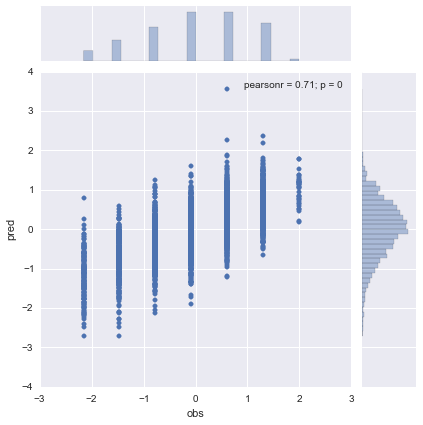

In [39]:
predykcja = pd.DataFrame({'obs': Y, 'pred': reg.predict(X)})
sns.jointplot(x="obs", y="pred", data=predykcja)

## Zobacz też

* [Statistical functions (scipy.stats)¶](http://docs.scipy.org/doc/scipy/reference/stats.html)
* [http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb)
